<h1><font color="#113D68" size=5>Deep Learning para Procesamiento del Lenguaje Natural</font></h1>



<h1><font color="#113D68" size=6>Como implementar Word Embeddings con Gensim</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [1. Word Embeddings](#section1)
    * [1.1. Biblioteca de Python de Gensim](#section11)
    * [1.2. Desarrollar la incrustación de Word2Vec](#section12)
    * [1.3. Visualizar Word Embeddings](#section13)
    * [1.4. Cargar el Embedding de Word2Vec de Google](#section14)
    * [1.5. Cargue la incrustación GloVe de Stanford](#section15)
* [2. Word Embedding en Keras](#section2)
    * [2.1. Ejemplo de aprendizaje de Embedding](#section21)
    * [2.2. Ejemplo de uso de GloVe preentrenado](#section22)
* [Ejercicios](#sectionEJ)
    * [Ejercicio 1](#sectionEJ1)
    * [Ejercicio 2](#sectionEJ2)
    * [Ejercicio 3](#sectionEJ3)
    * [Ejercicio 4](#sectionEJ4)
    * [Ejercicio 5](#sectionEJ5)
    * [Ejercicio 6](#sectionEJ6)
    * [Ejercicio 7](#sectionEJ7)
    * [Ejercicio 8](#sectionEJ8)

---
<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Word Embeddings</font>

Las incrustaciones de palabras son un enfoque moderno para representar texto en el procesamiento del lenguaje natural. Los algoritmos integrados como _Word2Vec_ y _GloVe_ son clave para los resultados de vanguardia logrados por los modelos de redes neuronales en problemas de procesamiento del lenguaje natural como la traducción automática.

En este tutorial, descubrirá cómo entrenar y cargar modelos de incrustación de palabras para aplicaciones de procesamiento de lenguaje natural en Python usando `Gensim`. 

<a id="section11"></a>
# <font color="#004D7F" size=5>1.1. Biblioteca de Python de `Gensim`</font>

`Gensim` es una biblioteca Python de código abierto para el procesamiento del lenguaje natural, con un enfoque en el modelado de temas. 

No es una biblioteca de investigación de NLP que incluye todo (como NLTK); en cambio, `Gensim` es un conjunto de herramientas de NLP maduras, enfocadas y eficientes para el modelado de temas. Admite una implementación de Word Embeddings _Word2Vec_ para aprender nuevos vectores de palabras a partir del texto.

También proporciona herramientas para cargar Word Embedding previamente entrenadas en algunos formatos y para utilizar y consultar una incrustación cargada. 

Puede instalar `Gensim` con `pip` escribiendo lo siguiente en su línea de comando:

In [3]:
!pip install -U gensim


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Words Embeddings en [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Instrucciones de instalación de [`Gensim`](https://radimrehurek.com/gensim/install.html)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Biblioteca Python [`Gensim`](https://radimrehurek.com/gensim/index.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section12"></a>
# <font color="#004D7F" size=5>1.2. Desarrollar la incrustación de _Word2Vec_</font>

_Word2Vec_ es un algoritmo para aprender una palabra incrustada a partir de un corpus de texto. Hay dos algoritmos de entrenamiento principales que se pueden usar para aprender la incrustación del texto; **son Bolsa de palabras continua (CBOW) y skip-grams**. Los modelos de _Word2Vec_ requieren mucho texto, por ejemplo, todo el corpus de Wikipedia. Sin embargo, demostraremos los principios usando un pequeño ejemplo de texto en la memoria. 

`Gensim` proporciona la clase `_Word2Vec` para trabajar con un modelo _Word2Vec_. Aprender un word Embedding a partir del texto implica cargar y organizar el texto en oraciones y proporcionarlas al constructor de una nueva instancia de `Word2Vec()`. Por ejemplo:

```python
    sentences =     ...
    model = Word2Vec(sentences)
```

Específicamente, cada oración debe ser tokenizada, es decir, dividida en palabras y preparada (por ejemplo, quizás prefiltrada y quizás convertida a un caso preferido). Las oraciones pueden ser
- Texto cargado en la memoria, o 
- Un iterador que carga texto progresivamente, requerido para corpus de texto muy grandes. 

Hay muchos parámetros en este constructor; algunos argumentos dignos de mención que puede desear configurar son:
- __`size`__ (predeterminado 100): El número de dimensiones de la incrustación, por ejemplo, la longitud del vector denso para representar cada token (palabra).
- __`window`__ (predeterminado 5): La distancia máxima entre una palabra objetivo y las palabras alrededor de la palabra objetivo. 
- __`min_count`__ (predeterminado 5): El recuento mínimo de palabras a considerar al entrenar el modelo; las palabras con una aparición menor que este número serán ignoradas.
- __`workers`__ (predeterminado 3): El número de subprocesos a usar durante el entrenamiento.
- __`sg`__ (predeterminado 0 o CBOW): El algoritmo de entrenamiento, ya sea CBOW (0) o salto de gram (1).

Por ejemplo, puede imprimir el vocabulario aprendido de tokens (palabras) de la siguiente manera:

```python
    words = model.wv.index_to_key
    print(words)
```

Puede revisar el vector incrustado para un token específico de la siguiente manera:

```python
    print(model.wv['word'])
```

Finalmente, un modelo entrenado se puede guardar en un archivo llamando a la función `save_word2vec_format()` en el modelo de vector de palabra. De forma predeterminada, el modelo se guarda en formato binario para ahorrar espacio. Por ejemplo:

```python
    model.wv.save_word2vec_format('model.bin')
```

Al comenzar, puede guardar el modelo aprendido en formato ASCII y revisar el contenido. Puede hacer esto configurando `binary=False` al llamar a la función `save_word2vec_format()`, por ejemplo:

```python
    model.wv.save_word2vec_format('model.txt', binary=False)
```

El modelo guardado se puede volver a cargar llamando a la función `Word2Vec.load()`. Por ejemplo:

```python
    model = Word2Vec.load('model.bin')
```

Podemos unir todo esto con un ejemplo resuelto. 
- En lugar de cargar un documento de texto grande o un corpus desde un archivo, trabajaremos con una pequeña lista en memoria de oraciones preidentificadas. 
- El modelo está entrenado y el recuento mínimo de palabras se establece en 1 para que no se ignore ninguna palabra. 
- Después de aprender el modelo, resumimos, imprimimos el vocabulario y luego imprimimos un solo vector para la palabra _"sentence"_. 
- Finalmente, el modelo se guarda en un archivo en formato binario, se carga y luego se resume.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Word2Vec en [Wikipedia](https://en.wikipedia.org/wiki/Word2vec)

In [1]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# print number of vocals
print(len(model.wv))
# summarize vocabulary
words = model.wv.index_to_key
print(words)
# access vector for one word
print("\n access vector for one word")
print(model.wv['sentence'])
# access vector for all words
print("\n access vector for all words")
print(model.wv.vectors)
# index of each words
print("\n index of each words")
print(model.wv.key_to_index)
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
14
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']

 access vector for one word
[-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1

Puedes ver que con un poco de trabajo para preparar tu documento de texto, puedes crear tu propio Word Embedding muy fácilmente con `Gensim`.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Información sobre la API Gensim [`models.word2vec`](https://radimrehurek.com/gensim/models/keyedvectors.html)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Información sobre la API Gensim [`models.keyedvectors`](https://radimrehurek.com/gensim/models/keyedvectors.html)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section13"></a>
# <font color="#004D7F" size=5>1.3. Visualizar Word Embeddings</font>

Podemos crear un modelo PCA bidimensional de los vectores de palabras utilizando la clase PCA de scikit-learn de la siguiente manera.

```python
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
```

La proyección resultante se puede trazar usando Matplotlib de la siguiente manera, sacando las dos dimensiones como
coordenadas x e y.

```python
    pyplot.scatter(result[:, 0], result[:, 1])
```

Podemos ir un paso más allá y anotar los puntos en el gráfico con las propias palabras.
```python
    words = model.wv.index_to_key
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
```

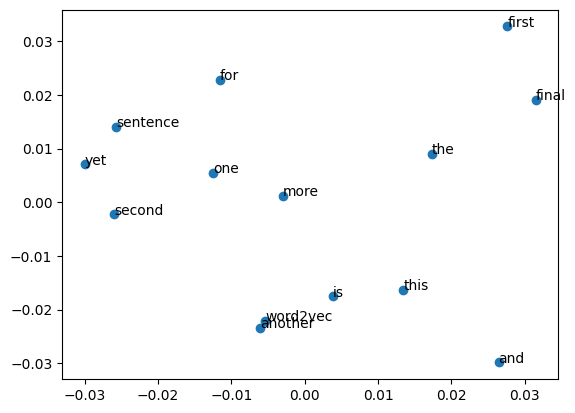

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
import numpy as np
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Ejecutar el ejemplo crea un gráfico de dispersión con los puntos anotados con las palabras. Es difícil sacar mucho significado del gráfico dado que se utilizó un corpus tan pequeño para ajustar el modelo.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section14"></a>
# <font color="#004D7F" size=5>1.4. Cargar el Embedding de Word2Vec de Google</font>

Un modelo preentrenado no es más que un archivo que contiene tokens y sus vectores de palabras asociados. El modelo Google _Word2Vec_ preentrenado se entrenó con datos de noticias de Google (alrededor de 100 mil millones de palabras); contiene 3 millones de palabras y frases y se ajustó utilizando vectores de palabras de 300 dimensiones.
Es un archivo de 1,53 Gigabytes. 

La librería `Gensim` proporciona herramientas para cargar este archivo. Específicamente, puede llamar a la función `KeyedVectors.load_word2vec_format()` para cargar este modelo en la memoria, por ejemplo:

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Se puede descargar [`GoogleNews-vectors-negative300.bin`](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)

In [3]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'data/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

Un ejemplo popular descrito en conferencias y documentos de introducción es:

`queen = (king - man) + woman`

Es decir, la palabra reina es la palabra más cercana dada la sustracción de la noción de hombre de la de rey y la adición de la palabra mujer. La masculinidad en rey es reemplazada por la feminidad para darnos reina. Un concepto muy genial. Gensim proporciona una interfaz para realizar este tipo de operaciones en la función `most_similar()` en el modelo entrenado o cargado. Por ejemplo:

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Proyecto Google [Word2Vec](https://code.google.com/archive/p/word2vec/)

In [4]:
# Check the "most similar words", using the default "cosine similarity" measure.
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


Al ejecutar el ejemplo, se carga el modelo _Word2Vec_ previamente entrenado por Google y luego se calcula el `(king - man) + women = ?` operación en los vectores de palabras para esas palabras. La respuesta, como era de esperar, es `queen`.

In [14]:
# Use a different similarity measure: "cosmul".
result = model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

queen: 0.9314


In [10]:
result = model.similar_by_word("cat")
most_similar_key, similarity = result[0]  # look at the first match
print(f"{most_similar_key}: {similarity:.4f}")

cats: 0.8099


In [12]:
result

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

Print the 5 most similar words to “car” or “minivan”

In [16]:
print(model.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


Which of the below does not belong in the sequence?

In [17]:
print(model.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section15"></a>
# <font color="#004D7F" size=5>1.5. Cargue la incrustación _GloVe_ de Stanford</font>

Los investigadores de Stanford también tienen su propio algoritmo de Word Embedding llamado Vectores Global Vectors (_GloVe_). 

Al igual que _Word2Vec_, los investigadores de _GloVe_ también proporcionan vectores de palabras previamente entrenados, en este caso, una gran selección para elegir. Puede descargar los vectores de palabras previamente entrenados de _GloVe_ y cargar fácilmente con _Gensim_. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Se puede descargar [`glove.6B.zip`](http://nlp.stanford.edu/data/glove.6B.zip)

Puede descargar el modelo preentrenado de _GloVe_ más pequeño del sitio web de _GloVe_. Es un archivo zip de 822 Megabytes con 4 modelos diferentes (vectores de 50, 100, 200 y 300 dimensiones) entrenados en datos de
Wikipedia con 6 mil millones de tokens y un vocabulario de 400,000 palabras. 

Trabajando con la versión de 100 dimensiones del modelo, podemos cargar el archivo a formato Word2Vec con la función `load_word2vec_format` de la clase `KeyedVectors`.

Ahora podemos cargarlo y realizar lo mismo que la prueba `(king - man) + woman = ?` como en el apartado anterior. 

La lista completa de códigos se proporciona a continuación. Tenga en cuenta que el archivo convertido tiene formato ASCII, no binario, por lo que establecemos `binary=False` al cargar y el `no_header=True` ya que no tiene encabezado.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Información sobre la API Gensim [`scripts.glove2word2vec`](https://radimrehurek.com/gensim/scripts/glove2word2vec.html)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Proyecto Stanford [GloVe](https://nlp.stanford.edu/projects/glove/)

In [18]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
# read de file
glove_input_file = 'data/glove.6B/glove.6B.100d.txt'
# load the converted model
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698540687561035)]


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Word Embedding en Keras</font>

Keras ofrece una capa Embedding que se puede usar para redes neuronales en datos de texto. 
- Requiere que los datos de entrada estén codificados en números enteros, de modo que cada palabra esté representada por un número entero único. 
- Para ello utilizamos la API `Tokenizer` de Keras.

La capa `Embedding` se define como la primera capa oculta de una red. Debe especificar 3 argumentos:
- __`input_dim`__: este es el tamaño del vocabulario en los datos de texto. 
    - Por ejemplo, si sus datos están codificados en números enteros con valores entre 0 y 10, entonces el tamaño del vocabulario sería de 11 palabras.
- __`output_dim`__: este es el tamaño del espacio vectorial en el que se incrustarán las palabras. Define el tamaño de los vectores de salida de esta capa para cada palabra. 
    - Por ejemplo, podría ser 32 o 100 o incluso más. Pruebe diferentes valores para su problema.
- __`input_length`__: esta es la longitud de las secuencias de entrada para cualquier capa de entrada de un modelo de Keras. 
    - Por ejemplo, si todos sus documentos de entrada se componen de 1000 palabras, esto sería 1000.

Por ejemplo, a continuación definimos una capa `Embedding` con un vocabulario de 200 (por ejemplo, palabras
codificadas con números enteros de 0 a 199, inclusive), un espacio vectorial de 32 dimensiones en el que se incrustarán palabras y documentos de entrada que tienen 50 palabras cada uno.

```python
    e = Embedding(200, 32, input_length = 50)
```

- La capa `Embedding` tiene pesos que se aprenden. 
    - Si guarda su modelo en un archivo, esto incluirá pesos para la capa `Embedding`. 
- La salida de la capa `Embedding` es un vector ___2D___ con una incrustación para cada palabra en la secuencia de palabras de entrada (documento de entrada). 
- Si desea conectar una capa `Dense` directamente a una capa `Embedding`, primero debe aplanar la matriz de salida 2D a un vector 1D usando la capa `Flatten`. 

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section21"></a>
# <font color="#004D7F" size=5>2.1. Ejemplo de aprendizaje de Embedding</font>

Definiremos un pequeño problema donde tenemos 10 documentos de texto, cada uno con un comentario sobre un trabajo enviado por un estudiante. Cada documento de texto se clasifica como __positivo 1__ o __negativo 0__. Este es un problema de análisis de reseñas simple.

Primero, definiremos los documentos y sus etiquetas de clase.

In [19]:
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

2022-12-05 15:35:16.603868: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 15:35:24.297982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.0/include:/usr/local/cuda-11.0/lib64:
2022-12-05 15:35:24.298522: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.0/include:/usr/local/cuda-11.0/lib64:
2022-12-05 15:35

A continuación, podemos codificar con enteros cada documento:
- Esto significa que como entrada, la capa `Embedding` tendrá secuencias de números enteros. 
- Keras proporciona la función `one_hot()` que crea un hash de cada palabra como una codificación de enteros. 
- Estimaremos el tamaño del vocabulario de 50, que es mucho más grande de lo necesario para reducir la probabilidad de colisiones de la función hash.

Imprimimos los documentos codificados en enteros.

In [20]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[35, 4], [6, 23], [42, 37], [10, 23], [33], [33], [8, 37], [29, 6], [8, 23], [45, 12, 4, 44]]


- Las secuencias tienen diferentes longitudes y Keras prefiere que las **entradas estén vectorizadas y que todas las entradas tengan la misma longitud**. 
- Rellenaremos todas las secuencias de entrada para que tengan una longitud de 4. 
    - Podemos hacer esto con la función `pad_sequences()`.

Se imprimen las versiones padded de cada documento, haciéndolos de longitud uniforme.

In [21]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[35  4  0  0]
 [ 6 23  0  0]
 [42 37  0  0]
 [10 23  0  0]
 [33  0  0  0]
 [33  0  0  0]
 [ 8 37  0  0]
 [29  6  0  0]
 [ 8 23  0  0]
 [45 12  4 44]]


Ahora estamos listos para definir nuestra capa `Embedding` como parte de nuestro modelo de red neuronal. 
- La capa `Embedding` tiene un vocabulario de 50 y una longitud de entrada de 4. 
- Elegiremos un pequeño espacio de incrustación de 8 dimensiones. 
- El modelo es un modelo de clasificación binaria simple.
- Es importante destacar que la salida de la capa `Embedding` será de 4 vectores de 8 dimensiones cada uno, uno para cada palabra. 
- Aplanamos esto a un vector de 32 elementos para pasar a la capa de salida `Dense`.

In [22]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
model.summary()

2022-12-05 15:40:05.326557: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:40:05.802296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:40:05.803496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:40:06.117534: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


Podemos ver que, como se esperaba, la salida de la capa `Embedding` es una matriz de $4 \times 8$ y la capa `Flatten` la reduce a un vector de 32 elementos.

Finalmente, podemos ajustar y evaluar el modelo de clasificación.

In [23]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

2022-12-05 15:40:59.302974: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1df28c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-05 15:40:59.304236: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro M1200, Compute Capability 5.0
2022-12-05 15:40:59.357316: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-05 15:41:00.024023: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-05 15:41:00.275754: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Accuracy: 80.000001


Finalmente, se imprime el Accuracy del modelo entrenado, mostrando que aprendió el entrenamiento conjunto de datos perfectamente (lo cual no es sorprendente).

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section22"></a>
# <font color="#004D7F" size=5>2.2. Ejemplo de uso de _GloVe_ preentrenado</font>

Después de descargar y descomprimir, verá algunos archivos, uno de los cuales es `glove.6B.100d.txt`, que contiene una versión de 100 dimensiones de la incrustación. Si mira dentro del archivo, verá un token (palabra) seguido de los pesos (100 números) en cada línea. Por ejemplo, a continuación se muestra la primera línea del archivo de texto ASCII incrustado que muestra la incrustación.

```text
    the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062
```

Como en la sección anterior, el primer paso es definir los ejemplos, codificarlos como números enteros y luego rellenar las secuencias para que tengan la misma longitud. 

En este caso, necesitamos poder mapear palabras a números enteros así como números enteros a palabras. Keras proporciona una clase `Tokenizer` que:
- se puede ajustar a los datos de entrenamiento, 
- puede convertir texto en secuencias de manera consistente llamando al método `texts_to_functions()` en la clase `Tokenizer`, y 
- proporciona acceso a la asignación de palabras a números enteros del diccionario en un atributo de índice de palabra.

In [24]:
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


A continuación, debemos cargar todo el archivo de Word Embeddings de _GloVe_ en la memoria como un diccionario de palabras para la matriz de incrustaciones.

In [25]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('data/glove.6B/glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


A continuación, debemos crear una matriz de una incrustación para cada palabra en el conjunto de datos de entrenamiento. 

Podemos hacerlo enumerando todas las palabras únicas en `Tokenizer.word_index` y ubicando el vector de peso de incrustación de la incrustación de _GloVe_ cargada. 

El resultado es una matriz de pesos solo para palabras que veremos durante el entrenamiento.

In [26]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Ahora podemos definir nuestro modelo, ajustarlo y evaluarlo como antes. 
- La diferencia clave es que la capa `Embedding` se puede establecer con los pesos de Word Embeddings de _GloVe_. 
- Elegimos la versión de 100 dimensiones, por lo tanto, la capa `Embedding` debe definirse con `output_dim` establecida en 100. 
- Finalmente, no queremos actualizar los pesos de las palabras aprendidas en este modelo, por lo tanto, estableceremos el atributo `trainable` para que el modelo sea `False`.

In [27]:
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
Accuracy: 100.000000


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="sectionEJ"></a>
# <font color="#004D7F" size=6><i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i>  Ejercicios</font>

Vamos a realizar un ejemplo con Word2Vec. En este ejemplo se utiliza un conjunto de datos compuesto por gráficos de películas (en formato txt). El archivo se llama `movie_plots.txt`

<a id="sectionEJ1"></a>
# <font color="#004D7F" size=5>Ejercicio 1</font>

Una vez descargado el conjunto de datos, hay que limpiarlo y preprocesarlo antes de generar las incrustaciones. 

El preprocesamiento incluye tareas como la tokenización, el minúsculas y la eliminación de palabras vacías. Gensim incluye un sencillo método de preprocesamiento que realiza estas tareas automáticamente `gensim.utils.simple_preprocessing(line)`.

Crea una función que haga este procesamiento.

In [2]:
import gensim

def process_input_file(input_file):
  token_list=[]
  with open(input_file,'r',encoding='utf-8',errors='ignore') as f:
    for line in f:
      token_list.append(gensim.utils.simple_preprocess(line))
  return token_list

documents=process_input_file("data/movie_plots.txt")

Una vez que se realiza este procesamiento previo, terminamos con una lista plana de tokens significativos, siguiendo el mismo orden de aparición que en los documentos de entrada. Esto asegura que se mantenga el contexto de la palabra. 

Para asegurarnos de que se cumple esta restricción, imprime la primera oración. Verifica que todos los tokens se han convertido a minúsculas y se han eliminado algunas palabras vacías. Aún así, el contexto de la oración original permanece.

In [3]:
documents[1]

['bartender',
 'is',
 'working',
 'at',
 'saloon',
 'serving',
 'drinks',
 'to',
 'customers',
 'after',
 'he',
 'fills',
 'stereotypically',
 'irish',
 'man',
 'bucket',
 'with',
 'beer',
 'carrie',
 'nation',
 'and',
 'her',
 'followers',
 'burst',
 'inside',
 'they',
 'assault',
 'the',
 'irish',
 'man',
 'pulling',
 'his',
 'hat',
 'over',
 'his',
 'eyes',
 'and',
 'then',
 'dumping',
 'the',
 'beer',
 'over',
 'his',
 'head',
 'the',
 'group',
 'then',
 'begin',
 'wrecking',
 'the',
 'bar',
 'smashing',
 'the',
 'fixtures',
 'mirrors',
 'and',
 'breaking',
 'the',
 'cash',
 'register',
 'the',
 'bartender',
 'then',
 'sprays',
 'seltzer',
 'water',
 'in',
 'nation',
 'face',
 'before',
 'group',
 'of',
 'policemen',
 'appear',
 'and',
 'order',
 'everybody',
 'to',
 'leave']

<a id="sectionEJ2"></a>
# <font color="#004D7F" size=5>Ejercicio 2</font>

Una vez que tenemos nuestro documento tokenizado, podemos inicializar y entrenar nuestro modelo Word2Vec. Antes de entrenar el modelo, se deben definir ciertos parámetros:
- __`vector_size`__: Dimensionalidad de los vectores de palabras. Debe ser coherente con la dimensionalidad del corpus del documento y el tamaño del vocabulario. **Como tenemos un corpus reducido, un tamaño de 100 debería ser adecuado para nuestro problema.**
- __`window`__: Dimensión de la ventana de contexto. Debería ser suficiente para contextualizar una palabra. **En este ejemplo, usaremos un tamaño 10.**
- __`min_count`__: Número mínimo de apariciones de una palabra en el corpus a considerar para la incrustación. **Consideraremos que al menos 3 repeticiones de una palabra son suficientes para ser incrustado**.
- __`sg`__: Algoritmo de entrenamiento: 1 para skip-gram; 0 para CBOW. **Usaremos skip-gram**.
- __`epochs`__: Número de iteraciones de entrenamiento. Haremos **5 iteraciones**.
- __`seed`__: semilla de inicialización. Usaremos 1852 como nuestra semilla.

Cree un objeto model llamadon a `Word2Vec` de Gensim con la configuración anterior y proceda a su entrenamiento con `train()`

In [ ]:
w2v_model = gensim.models.Word2Vec(documents, vector_size=100, window=10, min_count=3, sg=1, epochs=4, seed=1852)

In [9]:
w2v_model.train(documents, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(10490560, 13824376)

Una vez que se ha entrenado el modelo, podemos extraer las incrustaciones de palabras generadas (en forma de un diccionario de Python) y consultarlas.

In [10]:
w2v_embeddings=w2v_model.wv

<a id="sectionEJ3"></a>
# <font color="#004D7F" size=5>Ejercicio 3</font>

Con las incrustaciones extraídas, podemos realizar ciertas operaciones como:

**Preguntar por la palabra más parecida a una palabra dada**

In [11]:
word="singer"
w2v_embeddings.most_similar(positive=word)

[('dancer', 0.7542173862457275),
 ('performer', 0.7404608130455017),
 ('nightclub', 0.7175503373146057),
 ('soprano', 0.7144984006881714),
 ('starlet', 0.7025715708732605),
 ('superstar', 0.7015737295150757),
 ('ingenue', 0.6971699595451355),
 ('blondell', 0.691870391368866),
 ('sultry', 0.6902326345443726),
 ('vocalist', 0.6848028898239136)]

Si solo queremos obtener las _N_ palabras más similares, entonces:

In [12]:
word=["dog"]
n=3
w2v_embeddings.most_similar(positive=word,topn=n)

[('dogs', 0.6922426819801331),
 ('stray', 0.6798008680343628),
 ('puppy', 0.6707093715667725)]

<a id="sectionEJ4"></a>
# <font color="#004D7F" size=5>Ejercicio 4</font>

**Medir la similitud entre pares de palabras**

Dadas dos palabras existentes en el corpus, podemos medir la similitud existente entre las dos. Si el modelo se entrena adecuadamente, las palabras que se refieren a conceptos similares, como los sinónimos, deberían obtener puntajes altos de similitud.

Mide la similitud entre _movie_ y _film_

In [18]:
word1="movie"
word2="film"
w2v_embeddings.similarity(word1,word2)

0.82893413

Por el contrario, los antónimos deberían recibir puntuaciones bajas.

Mide la similitud entre _great_ y _awful_

In [19]:
word1="great"
word2="awful"
w2v_embeddings.similarity(word1,word2)

0.32233217

<a id="sectionEJ5"></a>
# <font color="#004D7F" size=5>Ejercicio 5</font>

**Recuperar el Embedding de una palabra dada**

Hay dos formas de recuperar el vector de una palabra. La primera forma es usando el método integrado `get_vector()`. Este modelo devuelve la incrustación asociada con la palabra de entrada si existe en el vocabulario y el error en caso contrario.

Utilícelo para la palabra beach

In [20]:
word="beach"
w2v_embeddings.get_vector(word)

array([-0.09560033, -0.03120027,  0.0207166 , -0.42926332, -0.01053735,
        0.26626188,  0.20543277, -0.00266073, -0.19645952, -0.1586069 ,
       -0.47515127,  0.29729855, -0.61440504,  0.21458566, -0.18524756,
       -0.08926032, -0.14477904,  0.343519  , -0.00412936,  0.25272048,
       -0.07780255, -0.06647279,  0.08216458,  0.01228995, -0.09513793,
       -0.3859143 , -0.30906942, -0.26056147, -0.09905334,  0.25973257,
        0.03177204, -0.2140215 , -0.1159922 ,  0.52084816, -0.01291936,
        0.01037219,  0.09694981, -0.3663353 ,  0.3576129 ,  0.38664055,
       -0.3601496 ,  0.13518448, -0.7304878 , -0.23689681,  0.05383343,
       -0.09771732,  0.32411745, -0.9362737 , -0.4343401 , -0.07585958,
       -0.00978419, -0.33632115,  0.02170849, -0.297619  ,  0.2529543 ,
        0.25787318,  0.16942401,  0.22072574,  0.00362314, -0.17207937,
        1.014553  , -0.05233747, -0.00123477, -0.00227715,  0.2380213 ,
       -0.18401477, -0.3446305 , -0.14515032,  0.01325089,  0.05

Teniendo en cuenta que las incrustaciones de palabras se almacenan en forma de diccionario compuesto por tuplas _(palabra, vector)_, donde las palabras sirven como claves, obten el embedding de _beach_:

In [21]:
w2v_embeddings['beach']

array([-0.09560033, -0.03120027,  0.0207166 , -0.42926332, -0.01053735,
        0.26626188,  0.20543277, -0.00266073, -0.19645952, -0.1586069 ,
       -0.47515127,  0.29729855, -0.61440504,  0.21458566, -0.18524756,
       -0.08926032, -0.14477904,  0.343519  , -0.00412936,  0.25272048,
       -0.07780255, -0.06647279,  0.08216458,  0.01228995, -0.09513793,
       -0.3859143 , -0.30906942, -0.26056147, -0.09905334,  0.25973257,
        0.03177204, -0.2140215 , -0.1159922 ,  0.52084816, -0.01291936,
        0.01037219,  0.09694981, -0.3663353 ,  0.3576129 ,  0.38664055,
       -0.3601496 ,  0.13518448, -0.7304878 , -0.23689681,  0.05383343,
       -0.09771732,  0.32411745, -0.9362737 , -0.4343401 , -0.07585958,
       -0.00978419, -0.33632115,  0.02170849, -0.297619  ,  0.2529543 ,
        0.25787318,  0.16942401,  0.22072574,  0.00362314, -0.17207937,
        1.014553  , -0.05233747, -0.00123477, -0.00227715,  0.2380213 ,
       -0.18401477, -0.3446305 , -0.14515032,  0.01325089,  0.05

<a id="sectionEJ6"></a>
# <font color="#004D7F" size=5>Ejercicio 6</font>

**Obtener la palabra más cercana a un vector dado**

Como las palabras se representan en un espacio vectorial, podemos realizar ciertas operaciones, como la suma o la resta, que también dan como resultado vectores. Como estas operaciones se basan en la intuición y, por lo tanto, no son exactas, el resultado de una operación como esta no está relacionado directamente con una palabra. 

Podemos obtener la palabra más cercana a un vector dado con las palabras _music_ y _film_

In [22]:
vector1=w2v_embeddings['music']
vector2=w2v_embeddings['film']
operation=vector1+vector2
w2v_embeddings.similar_by_vector(operation)

[('music', 0.8176624774932861),
 ('film', 0.8093442320823669),
 ('documentary', 0.7606794834136963),
 ('soundtrack', 0.7596319913864136),
 ('gershwin', 0.7518333792686462),
 ('movie', 0.7400728464126587),
 ('previn', 0.7384520173072815),
 ('theme', 0.7379338145256042),
 ('tchaikovsky', 0.7372975945472717),
 ('montage', 0.7340453863143921)]

<a id="sectionEJ7"></a>
# <font color="#004D7F" size=5>Ejercicio 7</font>

**Detectar términos inadecuados en una lista de palabras**

Dada una lista de palabras, podemos identificar cuál de ellas no está relacionada con el resto usando la función integrada `doesnt_match()`. Vea la salida para el siguiente vector: 
```python
word_list=['cat','dog','mouse','actress','bird']
```

In [23]:
word_list=['cat','dog','mouse','actress','bird']
w2v_embeddings.doesnt_match(word_list)

'actress'

<a id="sectionEJ8"></a>
# <font color="#004D7F" size=5>Ejercicio 8</font>

**Realizar analogías entre palabras**

Una de las mayores mejoras introducidas por Word2Vec fue la capacidad de realizar analogías entre palabras. Esta propiedad no solo pone en evidencia la calidad de las incrustaciones generadas por el modelo, sino que permite la representación **aproximada** de palabras que no se ven durante el entrenamiento.

Utilícelo con las siguientes palabras: _cat_, _cats_ y _mouse_

In [24]:
word1=w2v_embeddings['cat']
word2=w2v_embeddings['cats']
word3=w2v_embeddings['mouse']
operation=word1-word3+word2
w2v_embeddings.similar_by_vector(operation)

[('cats', 0.8237479329109192),
 ('cat', 0.6796796321868896),
 ('mice', 0.6646682024002075),
 ('garon', 0.6154602766036987),
 ('dogs', 0.6033499836921692),
 ('felines', 0.600951611995697),
 ('mutt', 0.600653350353241),
 ('shrug', 0.5995326042175293),
 ('duplicates', 0.5964731574058533),
 ('canary', 0.5950862169265747)]

Una forma más limpia y rápida de realizar inferencia analógica es:

In [25]:
w2v_embeddings.most_similar(positive=['cat', 'cats'], negative=['mouse'])

[('mice', 0.7246355414390564),
 ('canary', 0.6622194647789001),
 ('shrug', 0.6573811769485474),
 ('felines', 0.65106600522995),
 ('duplicates', 0.6507408022880554),
 ('kennel', 0.6485415697097778),
 ('feline', 0.6468013525009155),
 ('canine', 0.6461802124977112),
 ('dogs', 0.6455145478248596),
 ('garon', 0.6414704918861389)]

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>